# Basic Image Processing in Python

In [1]:
import numpy as np
import cv2
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline
print("Packages Loaded.")

Packages Loaded.


## Print current folder

In [2]:
cwd = os.getcwd()
print("Current folder is %s " % (cwd))

Current folder is /content 


## Print function

In [3]:
def print_typeshape(img):
  print("Type is %s " % (type(img)))
  print("Shape is %s " % (img.shape, ))

## Load an Image

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
img_path = "./drive/MyDrive/논문으로 짚어보는 딥러닝의 맥/data/simbba.jpg"

dog = imread(img_path)
print_typeshape(dog)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Type is <class 'numpy.ndarray'> 
Shape is (3024, 4032, 3) 


## Plot loaded image

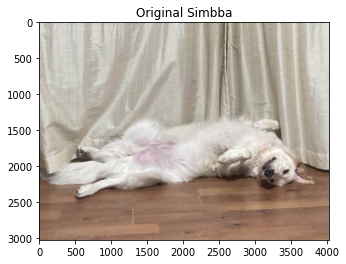

In [6]:
plt.figure(0)
plt.imshow(dog)
plt.title("Original Simbba")
plt.draw()

In [7]:
dog[0][0]

array([202, 194, 181], dtype=uint8)

## Load + Cast to float?

In [8]:
# Load
dog2 = imread(img_path).astype(np.float64)
print_typeshape(dog2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  


Type is <class 'numpy.ndarray'> 
Shape is (3024, 4032, 3) 


In [9]:
dog2[0][0]

array([202., 194., 181.])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


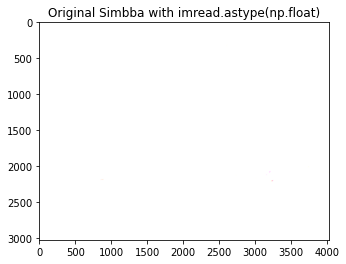

In [10]:
plt.figure(0)
plt.imshow(dog2)
plt.title("Original Simbba with imread.astype(np.float)")
plt.draw()

## Load + Cast to Float + Normalize to 0~1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:     `imread` is deprecated!
    `imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
    Use ``imageio.imread`` instead.
  


Type is <class 'numpy.ndarray'> 
Shape is (3024, 4032, 3) 


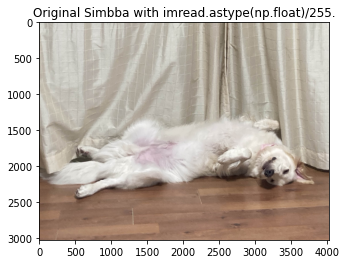

In [11]:
# Load
dog3 = imread(img_path).astype(np.float64)/255
print_typeshape(dog3)
# Plot
plt.figure(0)
plt.imshow(dog3)
plt.title("Original Simbba with imread.astype(np.float)/255.")
plt.draw()

## Resize

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  


Type is <class 'numpy.ndarray'> 
Shape is (100, 100, 3) 


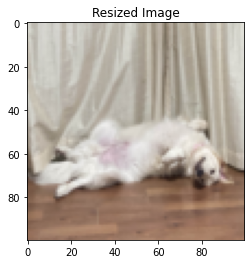

In [12]:
# Resize
dogsmall = imresize(dog, [100, 100])
print_typeshape(dogsmall)
#Plot
plt.figure(1)
plt.imshow(dogsmall)
plt.title("Resized Image")
plt.draw()

## Grayscale

In [13]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print ("Current Image if GRAY!")
        return rgb


dogsmallgray = rgb2gray(dogsmall)
print("size of dogsmallgray is %s" % (dogsmallgray.shape,))
print ("type of dogsmallgray is", type(dogsmallgray))

size of dogsmallgray is (100, 100)
type of dogsmallgray is <class 'numpy.ndarray'>


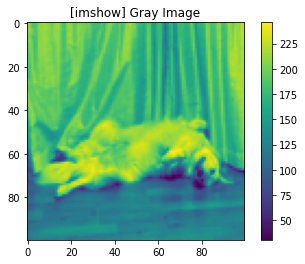

In [14]:
plt.imshow(dogsmallgray)
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

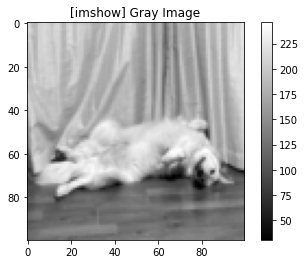

In [15]:
plt.imshow(dogsmallgray, cmap=plt.get_cmap("gray"))
plt.title("[imshow] Gray Image")
plt.colorbar()
plt.draw()

## Reshape

In [16]:
# Matrix to Vector
dogrowvec = np.reshape(dogsmallgray, (1, -1))
print("size of dogrowvec is %s" % (dogrowvec.shape, ))
print("type of dogrowvec is", type(dogrowvec))

# Vector to Matrix
dogmatrix = np.reshape(dogrowvec, (100, -1))
print("size of dogmatrix is %s" % (dogmatrix.shape, ))
print("type of dogmatrix is", type(dogmatrix))

size of dogrowvec is (1, 10000)
type of dogrowvec is <class 'numpy.ndarray'>
size of dogmatrix is (100, 100)
type of dogmatrix is <class 'numpy.ndarray'>


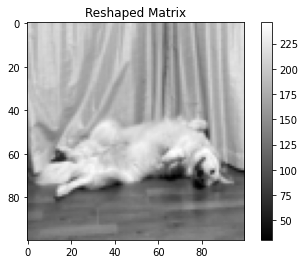

In [17]:
plt.imshow(dogmatrix, cmap=plt.get_cmap("gray"))
plt.title("Reshaped Matrix")
plt.colorbar()
plt.draw()

## Load from folder

In [ ]:
# FIRST, SEE WHAT'S INSIDE THE FOLDER
cwd = os.getcwd()
path = cwd + "/img/"
flist = os.listdir(path)
print ("[%d] FILE ARE IN [%s]" % (len(flist), path))

# LIST UP FILES INSIDE THE FOLDER
for i, f in enumerate(flist):
    print ("[%d] TH FILE IS [%s]" % (i, f))

# LOAD IMAGES WITH APPROPRIATE EXTENSIONS
valid_exts = [".jpg", ".gif", ".png", ".tga", ".jpeg")
imgs = []
names = []
for f in flist:
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_exts:
        continue
    # LOAD AND APPEND TO IMGS LIST
    fullpath = os.path.join(path, f)
    imgs.append(imread(fullpath))
    # APPEND NAMES
    names.append(os.path.splitext(f)[0])

# PLOT LOADED IMAGE
for img, name in zip(imgs, names):
    plt.imshow(img)
    plt.title(name)
    plt.show()